In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import logomaker
import matplotlib.gridspec as gridspec
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sys
path_to_mavenn_local = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn'
sys.path.insert(0,path_to_mavenn_local)

import mavenn

In [2]:
!ls results

1_full_wt  2_rnap_wt  3_full_500 4_full_150 5_full_0


In [3]:
!ls model_files

full-0.csv   full-150.csv full-500.csv full-wt.csv  rnap-wt.csv
full-0.h5    full-150.h5  full-500.h5  full-wt.h5   rnap-wt.h5


In [4]:
# results = []
# index = 0
# for exp_path in glob.glob('results/*'):
#     for exp_files in glob.glob(exp_path+'/*'):
#         if (index+1)%4==0 and index>0:    
#             results.append(np.load(exp_files))
#         else:        
#             results.append(pd.read_csv(exp_files))
#         print(index,exp_files)
#         index+=1
model_names = ['full-wt', 'rnap-wt', 'full-500', 'full-150', 'full-0']

# load_model
models = {}
for model_name in model_names:
    models[model_name] = mavenn.load('model_files/'+model_name)
    

In [5]:
# list which will contain results
results = []

# full-wt model
results.append(pd.DataFrame(models['full-wt'].get_gpmap_parameters()['value'].values[1:].reshape(39,4),columns=models['full-wt'].model.characters))
#results[0]['pos'] = results[0].index
results.append(pd.read_csv('results/1_full_wt/kinney_logo.csv'))
del results[1]['pos']
phi_range = np.linspace(-4,8,1000)
results.append(pd.DataFrame(models['full-wt'].na_p_of_all_y_given_phi(-phi_range).T).loc[::-1,::-1])
results.append(phi_range)

# rnap-wt model
results.append(pd.DataFrame(models['rnap-wt'].get_gpmap_parameters()['value'].values[1:].reshape(39,4),columns=models['full-wt'].model.characters))
#results[0]['pos'] = results[0].index
results.append(pd.read_csv('results/2_rnap_wt/kinney_logo.csv'))
del results[5]['pos']
phi_range = np.linspace(-4,8,1000)
results.append(pd.DataFrame(models['rnap-wt'].na_p_of_all_y_given_phi(-phi_range).T).loc[::-1,::-1])
results.append(phi_range)

# full-500 model
results.append(pd.DataFrame(models['full-500'].get_gpmap_parameters()['value'].values[1:].reshape(39,4),columns=models['full-wt'].model.characters))
# #results[0]['pos'] = results[0].index
results.append(pd.read_csv('results/3_full_500/kinney_logo.csv'))
del results[9]['pos']
phi_range = np.linspace(-2.5,7.5,1000)
results.append(pd.DataFrame(models['full-500'].na_p_of_all_y_given_phi(-phi_range).T).loc[::-1,::-1])
results.append(phi_range)

# full-150 model
results.append(pd.DataFrame(models['full-150'].get_gpmap_parameters()['value'].values[1:].reshape(39,4),columns=models['full-wt'].model.characters))
# #results[0]['pos'] = results[0].index
results.append(pd.read_csv('results/4_full_150/kinney_logo.csv'))
del results[13]['pos']
phi_range = np.linspace(-2.5,7.5,1000)
results.append(pd.DataFrame(models['full-150'].na_p_of_all_y_given_phi(-phi_range).T).loc[::-1,::-1])
results.append(phi_range)

# full-0 model
results.append(pd.DataFrame(models['full-0'].get_gpmap_parameters()['value'].values[1:].reshape(39,4),columns=models['full-wt'].model.characters))
# #results[0]['pos'] = results[0].index
results.append(pd.read_csv('results/5_full_0/kinney_logo.csv'))
del results[17]['pos']
phi_range = np.linspace(-2.5,7.5,1000)
results.append(pd.DataFrame(models['full-0'].na_p_of_all_y_given_phi(-phi_range).T).loc[::-1,::-1])
results.append(phi_range)

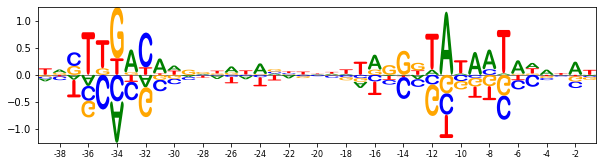

In [6]:
temp_logo_df = pd.DataFrame(results[0],columns=['A','C','G','T'])
temp_logo_df.index = np.arange(-39,0)
temp_logo = logomaker.Logo(temp_logo_df,font_name='Arial Rounded MT Bold')
#temp_logo.ax.set_xticks(range(len(temp_logo_df)))
temp_logo.ax.set_xticklabels('%+d'%x for x in list(np.arange(-39,0)))

temp_logo.style_xticks(spacing=2,fontsize=8)

[Text(0.5, 0, '-4.0'), Text(499.5, 0, '2'), Text(998.5, 0, '8.0')]

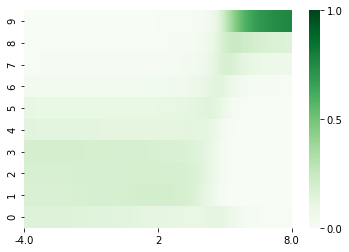

In [7]:
x_new = results[3]

noise_model_df = results[2]
#noise_model_df = pd.DataFrame(noise_model.predict([(x_new-bias)*norm-a+bias])).T
#ax = sns.heatmap(noise_model_df,cmap='Greens')
#ax = sns.heatmap(pd.DataFrame(np.log(noise_model.predict([-x]).ravel()+1e-20)).T,cmap='Greens')

# ax.grid(False)
# #plt.xticks([])
# plt.gca().invert_yaxis()
# cbar = ax.collections[0].colorbar
# cbar.set_ticks([0, 0.5, 1.0])
# plt.tight_layout()


#noise_model_df = pd.DataFrame(noise_model.predict([(x_new-bias)*norm-a+bias])).loc[::1,::-1].T
heatmap = sns.heatmap(noise_model_df,cmap='Greens',vmin=0,vmax=1, cbar_kws={'format': '%0.1f','ticks': [0, 0.5, 1],},xticklabels=499)
#plt.gca().invert_yaxis()
heatmap.set_xticks(([0,500,998]), minor=False)
heatmap.set_xticklabels(([str(x_new[0]),str(int((x_new[0]+x_new[len(x_new)-1])/2)),str(x_new[len(x_new)-1])]), minor=False)

'MyriadPro-Bold.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'MyriadPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


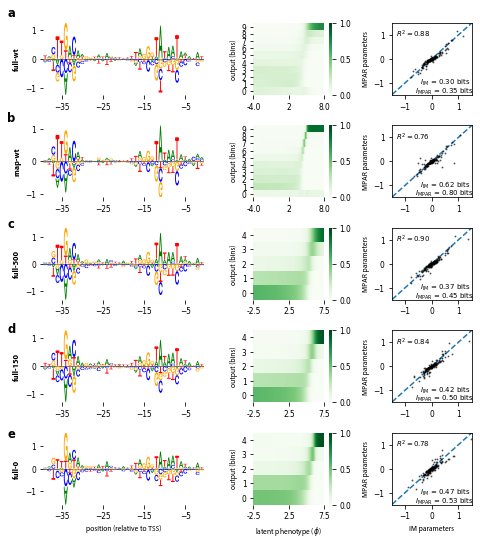

In [8]:
fig = plt.figure(figsize=(6.69291,7.5))


widths = [2,1.1,1]
import matplotlib

gs = fig.add_gridspec(5,3,width_ratios=widths)


column_1_labels = ['a','b','c','d','e']
column_2_labels = ['f','g','h','i','j']
column_3_labels = ['k','l','m','n','o']
Rsquared_values = ['0.88','0.76','0.90','0.84','0.78']
experiments_list = ['full-wt','rnap-wt','full-500','full-150','full-0',]

# these are in order of experiments_list
MI_sort_seq = ['0.3072686986333812','0.6293100194578256','0.3701937052020635','0.4250150592136217','0.4719553674750254']
MI_NAR = ['0.3587946407040896','0.8075633419496506','0.4583881904855962','0.5068673208161183','0.5391017416893755']

# 0.3867562342739577 NAR
# 0.3701937052020635 Sort-Seq

for plot_index in range(len(experiments_list)):
    
    ax1 = plt.subplot(gs[plot_index,0:1])
    temp_logo_df = pd.DataFrame(results[plot_index*4],columns=['A','C','G','T'])
    temp_logo_df.index = np.arange(-39,0)
    logos = logomaker.Logo(temp_logo_df,
                   font_name='Arial Rounded MT Bold',
                   ax=ax1)
    #temp_logo.ax.set_xticklabels('%d'%x for x in list(np.arange(-39,0)))
    #temp_logo.style_xticks(spacing=2)
    logos.style_spines(visible=False)
    ax1.tick_params(labelsize=7.5)
    
    #ax1.set_xticklabels('')

    # Customize minor tick labels
    ax1.set_xticks([-35,-25,-15,-5], minor=False)
    #ax1.set_xticklabels((['-10','-20']), minor=False)
    ax1.set_yticks([-1,0.0,1])
    
    ax1.set_ylabel(experiments_list[plot_index],fontsize=8,fontname='Myriad Pro',weight='bold',labelpad=+4)


    fig.text(0.01,0.985-plot_index*0.195,column_1_labels[plot_index],fontsize=11.5,fontweight='bold')
    #fig.text(-0.2, 1.23, column_1_labels[plot_index], transform=ax1.transAxes,
    #  fontsize=12, fontweight='bold', va='top', ha='right')
    

    #ax1.text(-0.2, 1.23, column_1_labels[plot_index], transform=ax1.transAxes,
    #  fontsize=12, fontweight='bold', va='top', ha='right')
    
    ax2 = plt.subplot(gs[plot_index,1:2])
    
#     if plot_index!=4:
       
#         heatmap = sns.heatmap(pd.DataFrame(results[plot_index*5+3].loc[::-1,::-1].T),cmap='Greens',
#                     ax=ax2,vmin=0,vmax=1, cbar_kws={'format': '%0.1f','ticks': [0, 0.5, 1],})
#         ax2.set_xticks([])    
#     else:
#         print(plot_index) 
    heatmap = sns.heatmap(pd.DataFrame(results[plot_index*4-1+3]),cmap='Greens',
                ax=ax2,vmin=0,vmax=1, cbar_kws={'format': '%0.1f','ticks': [0, 0.5, 1],},xticklabels=499)
    
    heatmap.set_xticks(([0,500,998]), minor=False)
    min_phi = str(min(results[plot_index*4-1+4]))
    max_phi = str(max(results[plot_index*4-1+4]))
                  
    if plot_index==0 or plot_index==1:                  
        middle_tick = '2'
    else:
        middle_tick = '2.5'    
                  
    heatmap.set_xticklabels(([min_phi,middle_tick,max_phi]), minor=False)

    if plot_index==0 or plot_index==1:
        # Hide major tick labels
        ax2.set_yticklabels('')

        # Customize minor tick labels
        ax2.set_yticks(np.flip([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5]), minor=False)
        ax2.set_yticklabels((['0','1','2','3','4','5','6','7','8','9']), minor=False)
        #ax2.set_yticks([0,1,2,3,4,5,6,7,8,9])
    else:            
        ax2.set_yticklabels('')

        # Customize minor tick labels
        ax2.set_yticks(np.flip([0.5,1.5,2.5,3.5,4.5]), minor=False)
        ax2.set_yticklabels((['0','1','2','3','4']), minor=False)
        
    cbar = heatmap.collections[0].colorbar


    cbar.ax.tick_params(labelsize=7.5)
    #cbar.set_ticks([0,0.4, 0.8])
    #cbar.ax.tick_params(labelsize=8.01)
    

    ax2.set_ylabel('output (bins)',fontsize=7.5,fontname='Myriad Pro')
    ax2.tick_params(labelsize=7.5,rotation=0)
    #fig.text(0.43,0.985-plot_index*0.195,column_2_labels[plot_index],fontsize=12,fontweight='bold')
    #ax2.text(-0.75, 1.23, column_2_labels[plot_index], transform=ax2.transAxes,
    #  fontsize=12, fontweight='bold', va='top', ha='right')
    #ax2.set_yticks([])
    
    ax3 = plt.subplot(gs[plot_index,2:3])
    ax3.scatter(results[plot_index*4+1].values.ravel(),results[plot_index*4].values.ravel(),s=1,alpha=0.5,color='black',zorder=10)
    ax3.tick_params(labelsize=7.5)
    
    #ax3.text(-0.75, 1.23, column_3_labels[plot_index], transform=ax3.transAxes,
    #  fontsize=12, fontweight='bold', va='top', ha='right')
    lims = [
        np.min([ax3.get_xlim(), ax3.get_ylim()]),  # min of both axes
        np.max([ax3.get_xlim(), ax3.get_ylim()]),  # max of both axes
        ]
    
#    ax3.plot([-0.25,0.45], [-0.25,0.45], '--', alpha=1, zorder=0)
    ax3.plot([-1.7,1.7], [-1.7,1.7], '--', alpha=1, zorder=0)
    
#     ax3.set_xlim(-0.25,0.45)
#     ax3.set_ylim(-0.25,0.45)
#     ax3.set_xticks([-0.2,0,0.2,0.4])
#     ax3.set_yticks([-0.2,0,0.2,0.4])

    ax3.set_xlim(-1.5,1.5)
    ax3.set_ylim(-1.5,1.5)
    ax3.set_xticks([-1,0,1])
    ax3.set_yticks([-1,0,1])
    
    #fig.text(0.725,0.985-plot_index*0.195,column_3_labels[plot_index],fontsize=12,fontweight='bold')
    ax3.set_ylabel('MPAR parameters',fontsize=7.5,fontname='Myriad Pro')
    
    ax3.text(0.05, 0.8, '$R^2=$'+Rsquared_values[plot_index],fontsize=7, fontweight='regular',transform=ax3.transAxes)#, transform=ax1.transAxes,va='top', ha='right')
    ax3.text(0.35, 0.145, '$I_{\mathrm{IM}}$ = '+MI_sort_seq[plot_index][0:4]+' bits',fontsize=7., fontweight='regular',transform=ax3.transAxes)#, transform=ax1.transAxes,va='top', ha='right')
    ax3.text(0.29, 0.025, '$I_{\mathrm{MPAR}}$ = '+MI_NAR[plot_index][0:4]+' bits',fontsize=7., fontweight='regular',transform=ax3.transAxes)#, transform=ax1.transAxes,va='top', ha='right')    


    ax3.tick_params(labelsize=7.5)
    if plot_index==4:
        ax1.set_xlabel('position (relative to TSS)',fontsize=7.5,fontname='Myriad Pro')
        ax2.set_xlabel('latent phenotype ($\phi$)',fontsize=7.5,fontname='Myriad Pro')
        ax3.set_xlabel('IM parameters',fontsize=7.5,fontname='Myriad Pro')
# ax2 = plt.subplot(gs[1,0:2])
# logomaker.Logo(pd.DataFrame(results[7],columns=['A','C','G','T']),
#                font_name='Arial Rounded MT Bold',
#                ax=ax2)


#fig.text(0,1,'a')
#fig.text(0,0.8,'b')
plt.tight_layout()
plt.savefig('fig5_sortseq.pdf')
#plt.suptitle("GridSpec")
#make_ticklabels_invisible(plt.gcf())

plt.show()
